In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
import os
os.chdir('F:/DataHackPremierLeague/train')

In [3]:
matches = pd.read_csv('match_data.csv')
delivery = pd.read_csv('ball_by_ball_data.csv')

In [4]:
matches.head(2)

,match_id,season,city,date,team1_id,team2_id,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,player_of_match_id,venue,venue_id,umpire1,umpire2
0,2008_1,2008,Bangalore,18-04-2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,Brendon McCullum,82.0,"M.Chinnaswamy Stadium Bengaluru, Karnataka",7,Asad Rauf,RE Koertzen
1,2008_2,2008,Chandigarh,19-04-2008,CSK,KXI,CSK,bat,normal,0,CSK,33,0,Michael Hussey,18.0,I.S. Bindra Punjab Cricket Association Stadium...,9,MR Benson,SL Shastri


In [5]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,batsman_id,non_striker,non_striker_id,bowler,bowler_id,batsman_runs,extra_runs,player_dismissed,player_dismissed_id,dismissal_kind,is_super_over
0,2017_1,1,SRH,RCB,1,1,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
1,2017_1,1,SRH,RCB,1,2,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0


In [6]:
print 'Total Matches Played:',matches.shape[0]
print ' \n Venues Played At:',matches['city'].unique()
print ' \n Teams :',matches['team1_id'].unique()

Total Matches Played: 636
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']
 
 Teams : ['KKR' 'CSK' 'RR' 'MI' 'DC' 'KXI' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']


In [11]:
print 'Total number of venues played at : ', matches['city'].nunique()
print 'Total teams participated : ',matches['team1_id'].nunique()

Total number of venues played at :  30
Total teams participated :  13


In [15]:
print 'Most number of man of the matches won by: ',matches['player_of_match'].value_counts().idxmax()

Most number of man of the matches won by:  Chris Gayle


In [25]:
df = matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['match_id','city','team1_id','team2_id','winner','win_by_runs']]

,match_id,city,team1_id,team2_id,winner,win_by_runs
620,2017_44,Delhi,MI,DD,MI,146


In [26]:
df = matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['match_id','city','team1_id','team2_id','winner','win_by_wickets']]

,match_id,city,team1_id,team2_id,winner,win_by_wickets
12,2008_13,Mumbai,MI,DC,DC,10


In [33]:
#Toss Decisions - whether the team that had won the toss chose to bat or field
print 'Toss decisions : \n',matches['toss_decision'].value_counts()
print 'Toss decisions in percentage: \n',(matches['toss_decision'].value_counts()/matches.shape[0])*100

Toss decisions : 
field    363
bat      273
Name: toss_decision, dtype: int64
Toss decisions in percentage: 
field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


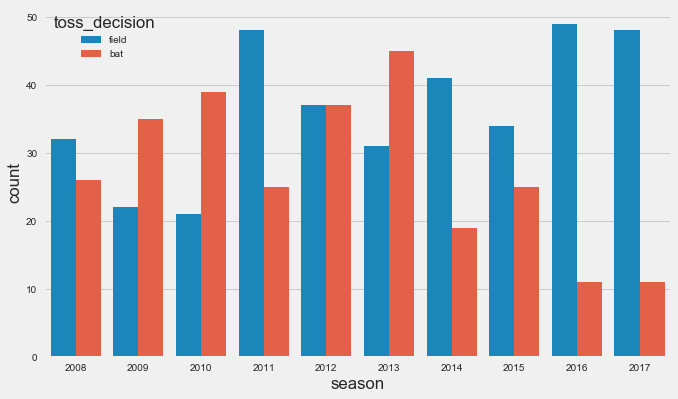

In [39]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

In [58]:
toss_match_winner = matches[(matches.toss_winner == matches.winner)]
print 'Percentage of matches won by toss winners : ',(float(toss_match_winner.shape[0])/matches.shape[0])*100

Percentage of matches won by toss winners :  51.1006289308


In [60]:
bat_first_won = matches[matches.win_by_runs != 0]
print 'Percentage of matches won by team batting first: ',(float(bat_first_won.shape[0])/636)*100
field_first_won = matches[matches.win_by_runs == 0]
print 'Percentage of matches won by team fielding first: ',(float(field_first_won.shape[0])/636)*100

Percentage of matches won by team batting first:  45.1257861635
Percentage of matches won by team fielding first:  54.8742138365


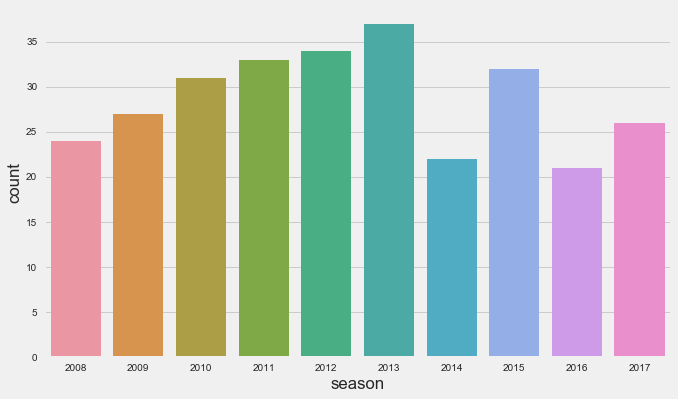

In [61]:
#Seasonwise winnings for bat first and field first
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=bat_first_won)
mlt.show()

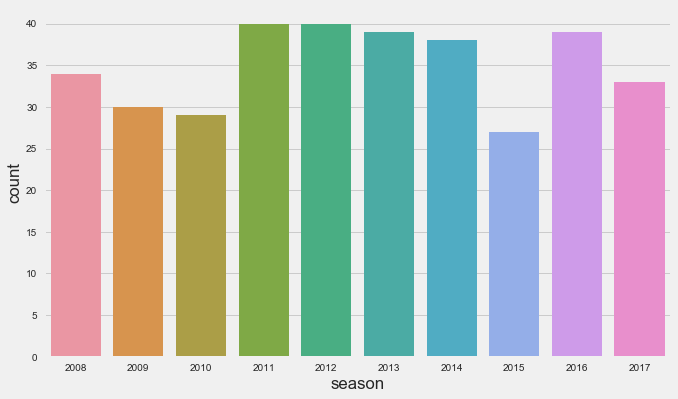

In [62]:
#Seasonwise winnings for bat first and field first
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=field_first_won)
mlt.show()

In [27]:
top_batsmen = delivery.groupby(["batsman"])["batsman_runs"].sum().reset_index().sort_values('batsman_runs', ascending=False)[1:15]
top_batsmen


,batsman,batsman_runs
443,Virat Kohli,4423
334,Rohit Sharma,4207
142,Gautam Gambhir,4132
111,David Warner,4014
330,Robin Uthappa,3778
91,Chris Gayle,3651
375,Shikhar Dhawan,3561
224,Mahendra Singh Dhoni,3560
0,AB De Villiers,3486
19,Ajinkya Rahane,3057


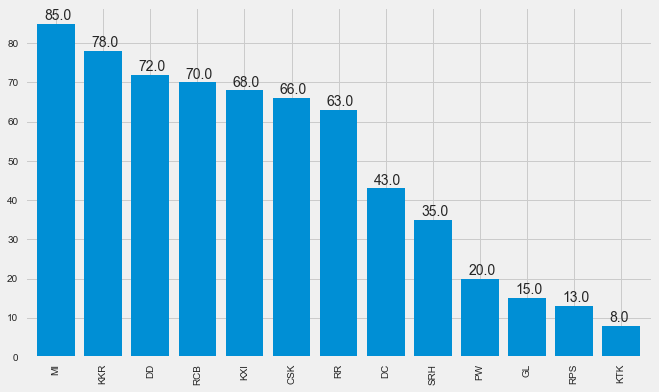

In [19]:
#Maaximum toss winners
mlt.subplots(figsize=(10,6))
ax = matches['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

In [70]:
#Batsman vs Bowler
def batsman_vs_bowler(batsman,bowler):
    print batsman, ' ',bowler
    #batsman = batsman.upper()
    #bowler = bowler.upper()
    data = delivery[(delivery.batsman == batsman) & (delivery.bowler == bowler)]
    print 'Number of balls faced by ', batsman, 'in bowling of ',bowler, ' : ',data.shape[0]
    
    if(data.shape[0] > 0):
        
        runs_by_category = data['batsman_runs'].value_counts()
        print 'Runs by category: \n', runs_by_category
        dismissals = data[data.dismissal_kind != 'run out']['dismissal_kind']
        print 'Dismisses: \n',dismissals.value_counts()
        fig = {
        "data": [
            {
                "values": runs_by_category.values ,
                "labels": runs_by_category.index,
                "text":"CO2",
                "textposition":"inside",
                "domain": {"x": [0, 0.5]},
                "name": "Runs",
                "hoverinfo":"label+percent+name",
                "hole": .4,
                "type": "pie"
            }
        ],
        "layout":{
            "title":"Runs scored divided",
            "annotations":[
                {
                    "font": {
                        "size": 15
                    },
                    "showarrow": False,
                    "text": "RUNS",
                    "x": 0.225,
                    "y": 0.5
                }
            ]
        }
        }

        py.iplot(fig, filename='donut')


In [76]:
batsman_vs_bowler('Mahendra Singh Dhoni','B Kumar')

Mahendra Singh Dhoni   B Kumar
Number of balls faced by  Mahendra Singh Dhoni in bowling of  B Kumar  :  44
Runs by category: 
1    16
0    11
2     6
6     5
4     5
3     1
Name: batsman_runs, dtype: int64
Dismisses: 
Series([], Name: dismissal_kind, dtype: int64)
